In [5]:
import urllib.parse
import urllib.request
import json
import time
import matplotlib.pyplot as plt
import pandas as pd

API_KEY="JHJKNRM6CC52KJTBZ66V29A86"
LOCATION="London"
UNIT_GROUP="us"

def getWeatherForecast():
         requestUrl = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/" + urllib.parse.quote_plus(LOCATION)
         requestUrl = requestUrl+"?key="+API_KEY+"&unitGroup="+UNIT_GROUP+"&include=days";
         
         print('Weather requestUrl={requestUrl}'.format(requestUrl=requestUrl))

         try:
                 req = urllib.request.urlopen(requestUrl)
         except:
                 print("Could not read from:"+requestUrl);
                 return []
                
         rawForecastData = req.read()
         req.close()
         return json.loads(rawForecastData)
    
weatherForecast = getWeatherForecast()

print('Weather forecast for {location}'.format(location=weatherForecast['resolvedAddress']))
days=weatherForecast['days'];

for day in days:
    print('{datetime} tempmax:{tempmax} tempmin:{tempmin} description:{description}'.format(datetime=day['datetime'], tempmax=day["tempmax"], tempmin=day["tempmin"], description=day["description"]))

Weather requestUrl=https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/London?key=JHJKNRM6CC52KJTBZ66V29A86&unitGroup=us&include=days
Weather forecast for London, England, United Kingdom
2022-03-19 tempmax:55.1 tempmin:45.6 description:Clear conditions throughout the day.
2022-03-20 tempmax:51.9 tempmin:38.7 description:Partly cloudy throughout the day.
2022-03-21 tempmax:55.1 tempmin:35.5 description:Partly cloudy throughout the day.
2022-03-22 tempmax:63.2 tempmin:43.6 description:Clearing in the afternoon.
2022-03-23 tempmax:62.7 tempmin:42.9 description:Partly cloudy throughout the day.
2022-03-24 tempmax:56.7 tempmin:40.9 description:Partly cloudy throughout the day.
2022-03-25 tempmax:55.8 tempmin:39.3 description:Partly cloudy throughout the day.
2022-03-26 tempmax:56.9 tempmin:38.4 description:Partly cloudy throughout the day.
2022-03-27 tempmax:57.8 tempmin:39.5 description:Clear conditions throughout the day.
2022-03-28 tempmax:55.1 tempmin:40.

In [6]:
dataframe = pd.DataFrame(days)

In [7]:
dataframe.head()

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sunriseEpoch,sunset,sunsetEpoch,moonphase,conditions,description,icon,stations,source,tzoffset
0,2022-03-19,1647648000,55.1,45.6,49.2,55.1,40.1,45.8,38.2,66.8,...,1647669941,18:11:52,1647713512,0.51,Clear,Clear conditions throughout the day.,clear-day,"[EGWU, EGLL, D5621, EGLC]",comb,NaN
1,2022-03-20,1647734400,51.9,38.7,45.1,51.9,35.8,42.7,32.3,62.9,...,1647756204,18:13:34,1647800014,0.53,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,None,fcst,NaN
2,2022-03-21,1647820800,55.1,35.5,45.7,55.1,35.5,45.6,38.4,77.7,...,1647842467,18:15:15,1647886515,0.56,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,None,fcst,NaN
3,2022-03-22,1647907200,63.2,43.6,51.5,63.2,40.9,50.6,42.6,73.4,...,1647928730,18:16:57,1647973017,0.61,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,None,fcst,NaN
4,2022-03-23,1647993600,62.7,42.9,51.1,62.7,39.2,49.7,39.2,66.4,...,1648014993,18:18:38,1648059518,0.66,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,None,fcst,NaN


<AxesSubplot:xlabel='datetime'>

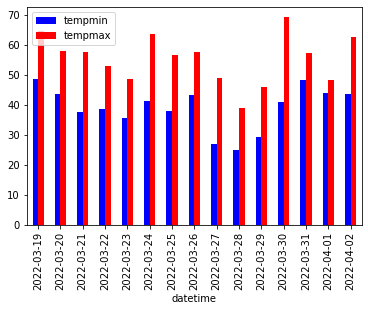

In [3]:
dataframe.plot.bar(x='datetime', y=['tempmin', 'tempmax',], color={ "tempmin": "blue", "tempmax": "red"})